# Training and testing the model.
## Model used: Linear Regression

In [22]:
# importing the cleaned data 
import pandas as pd

data = pd.read_csv('../encoded data/enc1.csv')
data

,Unnamed: 0,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,56,1933.05,1,14,1,72809.58,241.08,0,0,3.0,809.44,0,2,0,1.0,119933.46,54607.18
1,1,32,4952.91,1,6,1,46837.47,495.81,0,1,1.0,780.40,0,2,0,1.0,54791.00,37469.98
2,3,65,2614.77,0,6,0,80057.92,298.54,0,1,2.0,832.70,1,2,1,1.0,121441.51,56040.54
3,4,31,2614.77,1,6,1,113858.89,491.41,0,1,2.0,745.55,1,0,1,1.0,208567.91,74008.28
4,5,60,1234.92,1,15,0,34434.72,181.48,0,0,2.0,684.12,1,1,0,1.0,43146.82,22382.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20058,29995,38,4969.41,1,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,2,1.0,111096.56,68992.11
20059,29996,20,1606.88,1,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,2,1.0,73453.94,46616.60
20060,29997,49,2417.71,1,14,2,81410.08,583.11,0,1,3.0,677.27,0,0,0,1.0,102108.02,61057.56
20061,29998,38,2417.71,1,16,1,142524.10,378.29,0,1,3.0,677.27,1,2,2,1.0,168194.47,99766.87


In [23]:
# importing and creating the object of the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
# defining the independent variables 
X = data.drop(['Loan Sanction Amount (USD)', 'Unnamed: 0'], axis=1)
X

,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
0,56,1933.05,1,14,1,72809.58,241.08,0,0,3.0,809.44,0,2,0,1.0,119933.46
1,32,4952.91,1,6,1,46837.47,495.81,0,1,1.0,780.40,0,2,0,1.0,54791.00
2,65,2614.77,0,6,0,80057.92,298.54,0,1,2.0,832.70,1,2,1,1.0,121441.51
3,31,2614.77,1,6,1,113858.89,491.41,0,1,2.0,745.55,1,0,1,1.0,208567.91
4,60,1234.92,1,15,0,34434.72,181.48,0,0,2.0,684.12,1,1,0,1.0,43146.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20058,38,4969.41,1,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,2,1.0,111096.56
20059,20,1606.88,1,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,2,1.0,73453.94
20060,49,2417.71,1,14,2,81410.08,583.11,0,1,3.0,677.27,0,0,0,1.0,102108.02
20061,38,2417.71,1,16,1,142524.10,378.29,0,1,3.0,677.27,1,2,2,1.0,168194.47


In [25]:
# defining the dependent variable
Y = data['Loan Sanction Amount (USD)']
Y

0         54607.18
1         37469.98
2         56040.54
3         74008.28
4         22382.57
           ...    
20058     68992.11
20059     46616.60
20060     61057.56
20061     99766.87
20062    117217.90
Name: Loan Sanction Amount (USD), Length: 20063, dtype: float64

In [26]:
# splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101) 

# test size determines the split between training and testing data.
#  here 20% of the data is the testing data.
#  remaining 80% of the data is the training data.

In [27]:
X_train

,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
19700,60,2224.29,1,8,1,94575.64,433.72,0,1,1.0,677.17,0,1,1,1.0,165468.52
15760,18,934.00,1,15,1,19034.26,96.29,1,1,4.0,697.24,0,2,1,1.0,27495.06
16146,27,837.18,1,3,1,51443.55,236.04,1,1,3.0,654.10,0,0,2,1.0,79917.49
13937,18,2254.92,1,8,2,151454.60,605.46,1,1,2.0,806.19,0,1,2,1.0,230100.70
16645,18,3524.23,1,8,2,40890.25,309.40,0,1,2.0,684.09,0,0,2,1.0,68526.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,45,6658.52,1,3,1,124178.71,481.02,0,0,2.0,665.56,1,2,1,1.0,144640.90
8006,64,2451.97,1,14,1,68011.61,377.80,0,1,4.0,675.21,0,0,0,1.0,77242.59
17745,52,1608.08,1,4,0,76558.73,440.37,1,1,2.0,797.22,0,2,1,1.0,142244.38
17931,18,5411.25,1,6,1,220802.74,1062.19,1,0,2.0,764.32,1,2,0,1.0,327343.65


In [28]:
# training the model
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
# testing the model
predictions = model.predict(X_test)

In [30]:
# getting the r2 score of the trained model
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.9693971794711593

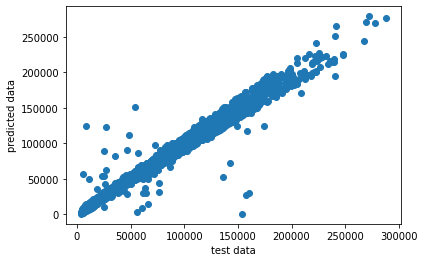

In [31]:
# plotting a scatter plot of the test output vs the predicted output

import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions)
plt.xlabel('test data')
plt.ylabel('predicted data')

plt.show()